In [85]:
from pyspark.sql import SparkSession

from pyspark.ml.feature import VectorAssembler

spark = SparkSession.builder \
   .appName("linear_regression") \
   .getOrCreate()

train_data = spark.read.format("csv") \
                .option("header", "true") \
                .option("inferSchema", "true") \
                .load("file:///content/drive/MyDrive/archive (5)/nepali/financial_loan.csv")
train_data.show(5)




+-------+-------------+----------------+----------+--------------------+-----+--------------+----------+---------------------+-----------------+-----------+-----------------+---------+-------+---------+----------+-------------------+-------------+------+-----------+--------+-----------+---------+-------------+
|     id|address_state|application_type|emp_length|           emp_title|grade|home_ownership|issue_date|last_credit_pull_date|last_payment_date|loan_status|next_payment_date|member_id|purpose|sub_grade|      term|verification_status|annual_income|   dti|installment|int_rate|loan_amount|total_acc|total_payment|
+-------+-------------+----------------+----------+--------------------+-----+--------------+----------+---------------------+-----------------+-----------+-----------------+---------+-------+---------+----------+-------------------+-------------+------+-----------+--------+-----------+---------+-------------+
|1077430|           GA|      INDIVIDUAL|  < 1 year|             

In [60]:
cleaned_df = train_data.na.drop(subset=['id',
 'address_state',
 'application_type',
 'emp_length',
 'emp_title',
 'grade',
 'home_ownership',
 'issue_date',
 'last_credit_pull_date',
 'last_payment_date',
 'loan_status',
 'next_payment_date',
 'member_id',
 'purpose',
 'sub_grade',
 'term',
 'verification_status','loan_amount',
 'total_acc',
 'total_payment'])

In [61]:
cleaned_df.select('emp_length').show()

+----------+
|emp_length|
+----------+
|  < 1 year|
|   9 years|
|   4 years|
|  < 1 year|
| 10+ years|
|   3 years|
| 10+ years|
| 10+ years|
| 10+ years|
| 10+ years|
| 10+ years|
|   3 years|
|   4 years|
|   5 years|
|   4 years|
|  < 1 year|
|    1 year|
|   4 years|
| 10+ years|
|   6 years|
+----------+
only showing top 20 rows





* Changes the values in the 'emp_length' column: if the value is greater than 10,  it becomes 15; if it's less than 1, it becomes 0; otherwise, it remains unchanged.




In [62]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import regexp_extract, expr, when

# Create a SparkSession
spark = SparkSession.builder \
    .appName("Emp Length Transformation") \
    .getOrCreate()

# Assuming you have a DataFrame named 'df' with the 'emp_length' column
# Example: df = spark.read.csv("your_file.csv", header=True)

# Apply transformation to the 'emp_length' column
transformed_df = cleaned_df.withColumn(
    "emp_length",
    when(
        regexp_extract("emp_length", r'(\d+)', 1).cast("int") > 10,  # Condition: greater than 10
        expr("15")
    ).when(
        regexp_extract("emp_length", r'(\d+)', 1).cast("int") < 1,  # Condition: less than 1
        expr("0")
    ).otherwise(
        regexp_extract("emp_length", r'(\d+)', 1)  # Otherwise keep the same value
    )
)

# Show the result
transformed_df.show(5)


+-------+-------------+----------------+----------+--------------------+-----+--------------+----------+---------------------+-----------------+-----------+-----------------+---------+-------+---------+----------+-------------------+-------------+------+-----------+--------+-----------+---------+-------------+
|     id|address_state|application_type|emp_length|           emp_title|grade|home_ownership|issue_date|last_credit_pull_date|last_payment_date|loan_status|next_payment_date|member_id|purpose|sub_grade|      term|verification_status|annual_income|   dti|installment|int_rate|loan_amount|total_acc|total_payment|
+-------+-------------+----------------+----------+--------------------+-----+--------------+----------+---------------------+-----------------+-----------+-----------------+---------+-------+---------+----------+-------------------+-------------+------+-----------+--------+-----------+---------+-------------+
|1077430|           GA|      INDIVIDUAL|         1|             

In [63]:
transformed_df.columns

['id',
 'address_state',
 'application_type',
 'emp_length',
 'emp_title',
 'grade',
 'home_ownership',
 'issue_date',
 'last_credit_pull_date',
 'last_payment_date',
 'loan_status',
 'next_payment_date',
 'member_id',
 'purpose',
 'sub_grade',
 'term',
 'verification_status',
 'annual_income',
 'dti',
 'installment',
 'int_rate',
 'loan_amount',
 'total_acc',
 'total_payment']



* Converts string categorical columns to numerical indices using StringIndexer for further processing in Spark ML.



In [64]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import StringIndexer
from pyspark.sql.functions import col

# Create a SparkSession
spark = SparkSession.builder \
    .appName("StringIndexer Example") \
    .getOrCreate()

# Assuming `train_data` is your DataFrame
df = transformed_df.withColumn("address_state", col("address_state").cast("string")) \
               .withColumn("application_type", col("application_type").cast("string"))\
               .withColumn("grade", col("application_type").cast("string")) \
               .withColumn("emp_length", col("emp_length").cast("string")) \
               .withColumn("emp_title", col("emp_title").cast("string")) \
               .withColumn("grade", col("grade").cast("string")) \
               .withColumn("home_ownership", col("home_ownership").cast("string")) \
               .withColumn("issue_date", col("issue_date").cast("string")) \
               .withColumn("last_credit_pull_date", col("last_credit_pull_date").cast("string")) \
               .withColumn("last_payment_date", col("last_payment_date").cast("string")) \
               .withColumn("loan_status", col("loan_status").cast("string")) \
               .withColumn("next_payment_date", col("next_payment_date").cast("string")) \
               .withColumn("purpose", col("purpose").cast("string")) \
               .withColumn("sub_grade", col("sub_grade").cast("string")) \
               .withColumn("term", col("term").cast("string")) \
               .withColumn("verification_status", col("verification_status").cast("string"))

# Now you can proceed with the StringIndexer for multiple columns
indexer = StringIndexer(inputCols=["address_state", "application_type", "emp_length", "emp_title",
                                   "grade", "home_ownership", "issue_date", "last_credit_pull_date",
                                   "last_payment_date", "loan_status", "next_payment_date", "purpose",
                                   "sub_grade", "term", "verification_status","grade"],
                        outputCols=["address_state_indexed", "application_type_indexed",
                                    "emp_length_indexed","emp_title_indexed", "grade_indexed",
                                    "home_ownership_indexed", "issue_date_indexed",
                                    "last_credit_pull_date_indexed", "last_payment_date_indexed",
                                    "loan_status_indexed", "next_payment_date_indexed",
                                    "purpose_indexed", "sub_grade_indexed", "term_indexed",
                                    "verification_status_indexed", "grade_index"]).fit(df)

# Transform the DataFrame
indexed_df = indexer.transform(df)
indexed_df.show(5)


+-------+-------------+----------------+----------+--------------------+----------+--------------+----------+---------------------+-----------------+-----------+-----------------+---------+-------+---------+----------+-------------------+-------------+------+-----------+--------+-----------+---------+-------------+---------------------+------------------------+------------------+-----------------+-------------+----------------------+------------------+-----------------------------+-------------------------+-------------------+-------------------------+---------------+-----------------+------------+---------------------------+-----------+
|     id|address_state|application_type|emp_length|           emp_title|     grade|home_ownership|issue_date|last_credit_pull_date|last_payment_date|loan_status|next_payment_date|member_id|purpose|sub_grade|      term|verification_status|annual_income|   dti|installment|int_rate|loan_amount|total_acc|total_payment|address_state_indexed|application_type

In [66]:
from pyspark.sql import SparkSession

# Create a SparkSession
spark = SparkSession.builder \
    .appName("Column Selection and CSV Write") \
    .getOrCreate()

# Assuming your DataFrame is named 'indexed_df'
# Extract the desired columns
selected_columns = ['annual_income','dti','installment','int_rate','loan_amount', 'total_acc','total_payment', 'address_state_indexed', 'application_type_indexed', 'emp_length_indexed', 'emp_title_indexed',
                    'grade_indexed', 'home_ownership_indexed', 'issue_date_indexed', 'last_credit_pull_date_indexed',
                    'last_payment_date_indexed', 'loan_status_indexed', 'next_payment_date_indexed', 'purpose_indexed',
                    'sub_grade_indexed', 'term_indexed', 'verification_status_indexed', 'grade_index']
selected_df = indexed_df.select(selected_columns)

# Save the selected columns to a new CSV file
selected_df.write.csv('selected_data.csv', header=True, mode='overwrite')

# Stop the SparkSession






*   Implement the Elbow method to determine the optimal number of clusters (k).
*   Iterate over a range of k values and fit KMeans models to the scaled data for each k value.
*   Calculate the Within-Cluster Sum of Squares (WCSS) for each model, which measures the compactness of clusters.
*   Plot the WCSS values against the corresponding k values to visualize the elbow point, indicating the optimal number of clusters.
*  A decrease in WCSS suggests that the clusters are more compact and tightly grouped, resulting in a better fit of the clusters to the data.
*  The elbow point is the point on the plot where the rate of decrease in WCSS significantly slows down, forming an elbow-like bend.
*   It represents the optimal number of clusters where adding more clusters does not lead to significant improvement in clustering quality.











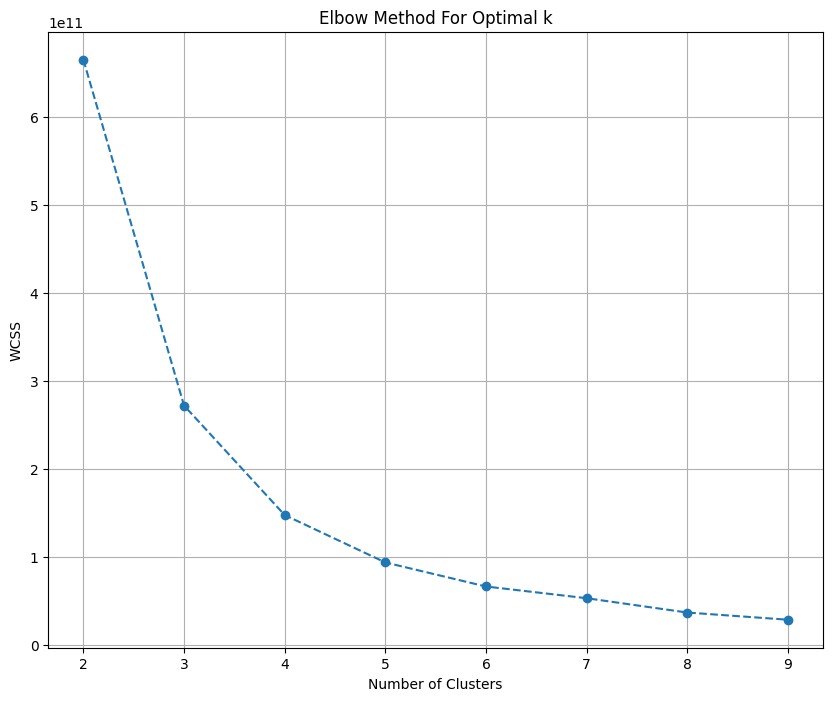

In [68]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler, StandardScaler
from pyspark.ml.clustering import KMeans
import matplotlib.pyplot as plt

# Initialize Spark session
spark = SparkSession.builder.appName("KMeans Elbow Method").getOrCreate()

# Load data
data = spark.read.csv('file:///content/selected_data.csv', header=True, inferSchema=True)

# Specify numerical and categorical columns
numerical_cols = [
    'annual_income', 'dti', 'installment', 'int_rate', 'loan_amount',
    'total_acc', 'total_payment'
]

categorical_cols = [
    'address_state_indexed', 'application_type_indexed', 'emp_length_indexed',
    'emp_title_indexed', 'grade_indexed', 'home_ownership_indexed',
    'issue_date_indexed', 'last_credit_pull_date_indexed',
    'last_payment_date_indexed', 'loan_status_indexed',
    'next_payment_date_indexed', 'purpose_indexed', 'sub_grade_indexed',
    'term_indexed', 'verification_status_indexed', 'grade_index'
]

# Assemble numerical columns into a feature vector
assembler_num = VectorAssembler(inputCols=numerical_cols, outputCol="numerical_features")
assembled_data_num = assembler_num.transform(data)

# Scale the numerical features
scaler = StandardScaler(inputCol="numerical_features", outputCol="scaled_numerical_features")
scaler_model = scaler.fit(assembled_data_num)
scaled_data_num = scaler_model.transform(assembled_data_num)

# Combine scaled numerical features with categorical features
assembler_all = VectorAssembler(inputCols=['scaled_numerical_features'] + categorical_cols, outputCol="features")
final_data = assembler_all.transform(scaled_data_num)

# Elbow method to find the optimal number of clusters
wcss = []
k_values = range(2, 10)  # Start k from 2 instead of 1

for k in k_values:
    kmeans = KMeans(k=k, seed=42, featuresCol='features')
    model = kmeans.fit(final_data)
    wcss.append(model.summary.trainingCost)

# Plot the elbow method graph
plt.figure(figsize=(10, 8))
plt.plot(k_values, wcss, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.xticks(k_values)
plt.grid(True)
plt.show()




*   Applies K-means clustering with k=3 clusters on the scaled data.
*   Calculates the mean of numerical features and the mode (most frequent value) of categorical features for each cluster.
*   Merges the mean and mode results into a single DataFrame for analysis and interpretation.
*   A high mean for a numerical feature within a cluster indicates that the average value of that feature is relatively large for the data points assigned to that cluster.
*   If a categorical feature has a high mode within a cluster, it means that among all the data points assigned to that cluster, one particular category appears most frequently.








In [75]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler, StandardScaler
from pyspark.ml.clustering import KMeans
from pyspark.sql.functions import col, count, desc, mean, first

# Initialize Spark session
spark = SparkSession.builder.appName("KMeans Clustering Mean and Mode").getOrCreate()

# Load data
data = spark.read.csv('file:///content/selected_data.csv', header=True, inferSchema=True)

# Specify the input columns
input_columns = [
    'annual_income',
    'dti',
    'installment',
    'int_rate',
    'loan_amount',
    'total_acc',
    'total_payment',
    'address_state_indexed',
    'application_type_indexed',
    'emp_length_indexed',
    'emp_title_indexed',
    'grade_indexed',
    'home_ownership_indexed',
    'issue_date_indexed',
    'last_credit_pull_date_indexed',
    'last_payment_date_indexed',
    'loan_status_indexed',
    'next_payment_date_indexed',
    'purpose_indexed',
    'sub_grade_indexed',
    'term_indexed',
    'verification_status_indexed',

]

# Assemble input columns into a feature vector
assembler = VectorAssembler(inputCols=input_columns, outputCol="features")
assembled_data = assembler.transform(data)

# Scale the data
scaler = StandardScaler(inputCol="features", outputCol="scaled_features")
scaler_model = scaler.fit(assembled_data)
scaled_data = scaler_model.transform(assembled_data)

# Apply K-means clustering
kmeans = KMeans(k=3, seed=42, featuresCol='scaled_features')
model = kmeans.fit(scaled_data)
predictions = model.transform(scaled_data)

# Select numerical and categorical columns
numerical_columns = ['issue_date_indexed',
 'last_credit_pull_date_indexed',
 'last_payment_date_indexed',
 'next_payment_date_indexed',
 'annual_income',
 'dti',
 'installment',
 'int_rate',
 'loan_amount',
 'total_acc',
 'total_payment',]
categorical_columns = ['emp_title_indexed','purpose_indexed','term_indexed','loan_status_indexed','verification_status_indexed','address_state_indexed', 'application_type_indexed', 'grade_indexed','sub_grade_indexed', 'emp_length_indexed', 'home_ownership_indexed']

# Calculate mean for numerical columns within each cluster
mean_df = predictions.groupBy("prediction").agg(
    *[mean(col).alias(f'mean_{col}') for col in numerical_columns]
)

# Show mean results
mean_df.show()

# Calculate mode for categorical columns within each cluster
for col_name in categorical_columns:
    mode_df = predictions.groupBy("prediction", col_name).agg(count(col_name).alias('count')) \
        .orderBy('prediction', desc('count')) \
        .groupBy("prediction") \
        .agg(first(col_name).alias(f'mode_{col_name}'))

    # Show mode results
    mode_df.show()

# Merge mean and mode results
result_df = mean_df
for col_name in categorical_columns:
    mode_df = predictions.groupBy("prediction", col_name).agg(count(col_name).alias('count')) \
        .orderBy('prediction', desc('count')) \
        .groupBy("prediction") \
        .agg(first(col_name).alias(f'mode_{col_name}'))

    result_df = result_df.join(mode_df, on="prediction")

# Show final result
result_df.show()


+----------+-----------------------+----------------------------------+------------------------------+------------------------------+------------------+-------------------+------------------+-------------------+------------------+------------------+------------------+
|prediction|mean_issue_date_indexed|mean_last_credit_pull_date_indexed|mean_last_payment_date_indexed|mean_next_payment_date_indexed|mean_annual_income|           mean_dti|  mean_installment|      mean_int_rate|  mean_loan_amount|    mean_total_acc|mean_total_payment|
+----------+-----------------------+----------------------------------+------------------------------+------------------------------+------------------+-------------------+------------------+-------------------+------------------+------------------+------------------+
|         1|     10.130160667073419|                14.850772828960748|            17.247508643481797|             17.25330486068741|60158.867500508466|0.13325540980272527|239.98633211307825|0.

In [76]:
data.columns

['annual_income',
 'dti',
 'installment',
 'int_rate',
 'loan_amount',
 'total_acc',
 'total_payment',
 'address_state_indexed',
 'application_type_indexed',
 'emp_length_indexed',
 'emp_title_indexed',
 'grade_indexed',
 'home_ownership_indexed',
 'issue_date_indexed',
 'last_credit_pull_date_indexed',
 'last_payment_date_indexed',
 'loan_status_indexed',
 'next_payment_date_indexed',
 'purpose_indexed',
 'sub_grade_indexed',
 'term_indexed',
 'verification_status_indexed',
 'grade_index']



*   Scaled numerical features are combined with categorical features into a unified format for clustering.
*  Splits the combined data into training and testing sets for model evaluation.
*   Applies dimensionality reduction using PCA to reduce features to two dimensions, then performs K-means clustering with three clusters on the transformed training data.
*   Finally, predicts cluster assignments for the test data based on the trained model.





In [77]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler, StandardScaler, PCA
from pyspark.sql.functions import rand

# Create a SparkSession
spark = SparkSession.builder.appName("Customer_segmentation").getOrCreate()

# Load the data
loan_data = spark.read.csv("selected_data.csv", header=True, inferSchema=True)

# List of numerical and categorical feature columns
numerical_cols = ['annual_income', 'dti', 'installment', 'int_rate', 'loan_amount', 'total_acc', 'total_payment']
categorical_cols = ['address_state_indexed', 'application_type_indexed', 'emp_length_indexed',
                    'emp_title_indexed', 'grade_indexed', 'home_ownership_indexed',
                    'issue_date_indexed', 'last_credit_pull_date_indexed',
                    'last_payment_date_indexed', 'loan_status_indexed',
                    'next_payment_date_indexed', 'purpose_indexed', 'sub_grade_indexed',
                    'term_indexed', 'verification_status_indexed', 'grade_index']

# Assemble the numerical features
assembler_num = VectorAssembler(inputCols=numerical_cols, outputCol="numerical_features")
assembled_data_num = assembler_num.transform(loan_data)

# Normalize the numerical features
scaler = StandardScaler(inputCol="numerical_features", outputCol="scaled_numerical_features", withStd=True, withMean=False)
scaler_model = scaler.fit(assembled_data_num)
scaled_data_num = scaler_model.transform(assembled_data_num)

# Combine the scaled numerical features with categorical features
assembler_all = VectorAssembler(inputCols=['scaled_numerical_features'] + categorical_cols, outputCol="features")
final_data = assembler_all.transform(scaled_data_num)

# Split the data into training and testing sets
final_data = final_data.withColumn("rand", rand())
final_data = final_data.orderBy("rand")
training_data, test_data = final_data.randomSplit([0.7, 0.3], seed=42)

# Apply PCA for dimensionality reduction
pca = PCA(k=2, inputCol="features", outputCol="pca_features")
pca_model = pca.fit(training_data)
training_data_pca = pca_model.transform(training_data)
test_data_pca = pca_model.transform(test_data)

# Train the K-Means model on the PCA-transformed data
kmeans = KMeans(k=3, featuresCol="pca_features", predictionCol="cluster")
kmeans_model = kmeans.fit(training_data_pca)

# Use the model for predictions on the PCA-transformed test data
predictions = kmeans_model.transform(test_data_pca)

# Show some predictions
predictions.select('scaled_numerical_features','features','pca_features', 'cluster').show()

+-------------------------+--------------------+--------------------+-------+
|scaled_numerical_features|            features|        pca_features|cluster|
+-------------------------+--------------------+--------------------+-------+
|     [0.07473124774308...|(23,[0,2,3,4,5,6,...|[25325.9979160372...|      2|
|     [0.10898306962533...|[0.10898306962533...|[2737.99576471442...|      1|
|     [0.12143827758251...|[0.12143827758251...|[20326.9952361679...|      2|
|     [0.12455207957181...|[0.12455207957181...|[7286.99804130472...|      1|
|     [0.13233658454504...|[0.13233658454504...|[23067.9946052809...|      2|
|     [0.14946249548617...|[0.14946249548617...|[21370.9996607736...|      2|
|     [0.14946249548617...|[0.14946249548617...|[14022.9982865284...|      0|
|     [0.14946249548617...|[0.14946249548617...|[943.997257564434...|      1|
|     [0.15151760479910...|[0.15151760479910...|[9201.99584948582...|      0|
|     [0.15569009946476...|[0.15569009946476...|[473.99606596573

In [78]:
# Register the DataFrame as a temporary view
predictions.createOrReplaceTempView("predictions")

# Use Spark SQL to count the occurrences of each unique value in the 'cluster' column
unique_counts = spark.sql("SELECT cluster, COUNT(*) AS count FROM predictions GROUP BY cluster")

# Show the result
unique_counts.show()


+-------+-----+
|cluster|count|
+-------+-----+
|      1| 4703|
|      2| 3140|
|      0| 3135|
+-------+-----+



In [79]:
predictions.show(5)

+-------------+------+-----------+--------+-----------+---------+-------------+---------------------+------------------------+------------------+-----------------+-------------+----------------------+------------------+-----------------------------+-------------------------+-------------------+-------------------------+---------------+-----------------+------------+---------------------------+-----------+--------------------+-------------------------+--------------------+-------------------+--------------------+-------+
|annual_income|   dti|installment|int_rate|loan_amount|total_acc|total_payment|address_state_indexed|application_type_indexed|emp_length_indexed|emp_title_indexed|grade_indexed|home_ownership_indexed|issue_date_indexed|last_credit_pull_date_indexed|last_payment_date_indexed|loan_status_indexed|next_payment_date_indexed|purpose_indexed|sub_grade_indexed|term_indexed|verification_status_indexed|grade_index|  numerical_features|scaled_numerical_features|            feature

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

In [81]:
cluster_0 = predictions.filter(predictions["cluster"] == 0)
cluster_1 = predictions.filter(predictions["cluster"] == 1)
cluster_2 = predictions.filter(predictions["cluster"] == 2)



# Show the result
cluster_0.show(5)
cluster_1.show(5)
cluster_2.show(5)





+-------------+------+-----------+--------+-----------+---------+-------------+---------------------+------------------------+------------------+-----------------+-------------+----------------------+------------------+-----------------------------+-------------------------+-------------------+-------------------------+---------------+-----------------+------------+---------------------------+-----------+--------------------+-------------------------+--------------------+--------------------+--------------------+-------+
|annual_income|   dti|installment|int_rate|loan_amount|total_acc|total_payment|address_state_indexed|application_type_indexed|emp_length_indexed|emp_title_indexed|grade_indexed|home_ownership_indexed|issue_date_indexed|last_credit_pull_date_indexed|last_payment_date_indexed|loan_status_indexed|next_payment_date_indexed|purpose_indexed|sub_grade_indexed|term_indexed|verification_status_indexed|grade_index|  numerical_features|scaled_numerical_features|            featur

In [82]:
predictions.columns

['annual_income',
 'dti',
 'installment',
 'int_rate',
 'loan_amount',
 'total_acc',
 'total_payment',
 'address_state_indexed',
 'application_type_indexed',
 'emp_length_indexed',
 'emp_title_indexed',
 'grade_indexed',
 'home_ownership_indexed',
 'issue_date_indexed',
 'last_credit_pull_date_indexed',
 'last_payment_date_indexed',
 'loan_status_indexed',
 'next_payment_date_indexed',
 'purpose_indexed',
 'sub_grade_indexed',
 'term_indexed',
 'verification_status_indexed',
 'grade_index',
 'numerical_features',
 'scaled_numerical_features',
 'features',
 'rand',
 'pca_features',
 'cluster']



*   Utilizes ClusteringEvaluator from PySpark to assess the model's performance using the silhouette score.
*   Calculates the silhouette score based on the predicted clusters and input features specified by the predictions DataFrame.
*   A higher silhouette score indicates better-defined clusters, with points in the same cluster being more similar to each other than to points in other clusters.






In [83]:
from pyspark.ml.evaluation import ClusteringEvaluator

# Evaluate the model using silhouette score
evaluator = ClusteringEvaluator(predictionCol="cluster", featuresCol="pca_features", metricName="silhouette")
silhouette_score = evaluator.evaluate(predictions)

print("Silhouette Score:", silhouette_score)

Silhouette Score: 0.7913326925802828




*   Extracts features and cluster assignments from the predictions DataFrame, which contains information about predicted clusters for each data point.
*   Iterates over each cluster to process the data points belonging to that cluster.
*   For each cluster, extracts the x and y values of data points to plot them on the scatter plot.
*   Computes the centroid of each cluster using NumPy's mean function, which calculates the average position of all data points in the cluster.








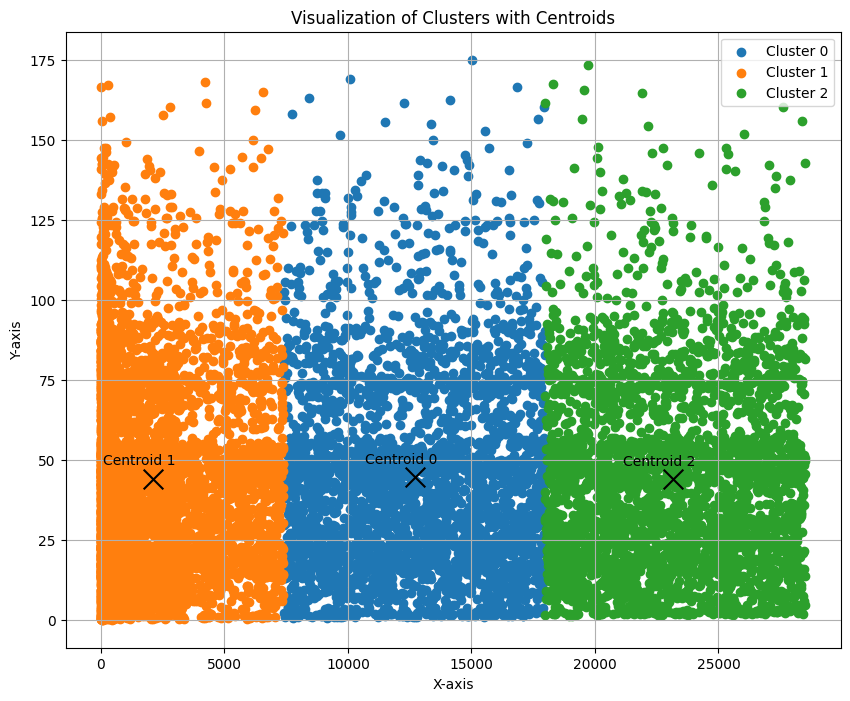

In [84]:
import numpy as np

# Extract features and cluster assignments from predictions DataFrame
features = predictions.select("pca_features").collect()
clusters = predictions.select("cluster").collect()

x_values = [feature[0][0] for feature in features]
y_values = [feature[0][1] for feature in features]

plt.figure(figsize=(10, 8))
for i in range(3):
    cluster_x = [x_values[j] for j in range(len(clusters)) if clusters[j][0] == i]
    cluster_y = [y_values[j] for j in range(len(clusters)) if clusters[j][0] == i]
    plt.scatter(cluster_x, cluster_y, label=f'Cluster {i}')

    # Compute the centroid of the current cluster
    centroid_x = np.mean(cluster_x)
    centroid_y = np.mean(cluster_y)
    plt.scatter(centroid_x, centroid_y, color='black', marker='x', s=200)  # Mark centroid with a black 'x'

    # Annotate the centroid with its cluster number
    plt.annotate(f'Centroid {i}', (centroid_x, centroid_y), textcoords="offset points", xytext=(-10,10), ha='center')

plt.title('Visualization of Clusters with Centroids')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.grid(True)
plt.show()
